# Example 1 of Phoeniks
> **P**ULS **h**ands-on **o**ptimized **e**xtraction *of* $\boldsymbol{n} - \boldsymbol{i}\cdot \boldsymbol{k}$'s


Load a single reference trace and sample trace and extract the refractive index and absorption.

In [1]:
import os
os.getcwd()
##Ekstralar
# conda upgrade ipython
# conda install -c conda-forge ipywidgets
# conda install -c conda-forge ipympl

'C:\\Users\\Hasan\\Desktop\\phoeniks-main\\examples\\01_Basic_Extraction'

In [1]:
# General Python libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import EngFormatter
#%matplotlib notebook
%matplotlib widget
!cd "C:\Users\Hasan\Desktop\phoeniks-main\examples\01_Basic_Extraction"
home_dir = os.getcwd()
os.chdir(r"../..")
# Own library
import phoeniks as pk
os.chdir(home_dir)

In [2]:
help(pk)

Help on package phoeniks:

NAME
    phoeniks

PACKAGE CONTENTS
    artificial_sample
    extraction
    optimization_problem
    plot
    post_processing
    svmaf
    thz_data

DATA
    __all__ = ['extraction', 'optimization_problem', 'plot', 'svmaf', 'thz...

FILE
    c:\users\hasan\desktop\phoeniks-main\phoeniks\__init__.py




# Load data
Loading reference file.

In [3]:
ref_file = "Artifical_Reference.txt"
ref = np.loadtxt(ref_file)
ref, ref.shape

(array([[ 0.00000000e+00, -1.60383681e-05],
        [ 2.44081035e-14,  6.40999140e-07],
        [ 4.88162070e-14,  7.40891296e-06],
        ...,
        [ 9.99023676e-11,  6.33831967e-06],
        [ 9.99267757e-11, -2.84087715e-05],
        [ 9.99511838e-11,  1.45666341e-05]]),
 (4096, 2))

The first column contains the time in [s], the second column the signal in [V].
We can use the first column to derive the time-axis for the signal and save it seperately:

In [4]:
time = ref[:, 0]
time

array([0.00000000e+00, 2.44081035e-14, 4.88162070e-14, ...,
       9.99023676e-11, 9.99267757e-11, 9.99511838e-11])

Load the sample file. For this artificial sample, a thickness of 1 mm was used.

In [5]:
sample_thickness = 1e-3
sam_file = "Artifical_Sample_1mm.txt"
sam = np.loadtxt(sam_file)
sam, sam.shape

(array([[0.00000000e+00, 4.84987803e-06],
        [2.44081035e-14, 5.14138791e-07],
        [4.88162070e-14, 1.76140758e-05],
        ...,
        [9.99023676e-11, 1.25153898e-06],
        [9.99267757e-11, 1.13731580e-05],
        [9.99511838e-11, 2.80678054e-06]]),
 (4096, 2))

# Create data object
Feed this data into the THz data object. As a bare minimum, the following data needs to be supplied:
1. time-axis (same for reference and sample trace)
2. Signal of reference measurement in time-domain
3. Signal of sample measurement in time-domain

Yüklenen veriler, pk.thz_data.Data sınıfı kullanılarak bir veri nesnesine dönüştürülür. Bu nesne, referans ve örnek sinyallerini ve zaman eksenini içerir.

In [6]:
data = pk.Data(time, ref[:, 1], sam[:, 1]) #thz_data içindeki Data sınıfı
data

# Plot data
To get a better view on the data, we can create a plot of reference and sample file:

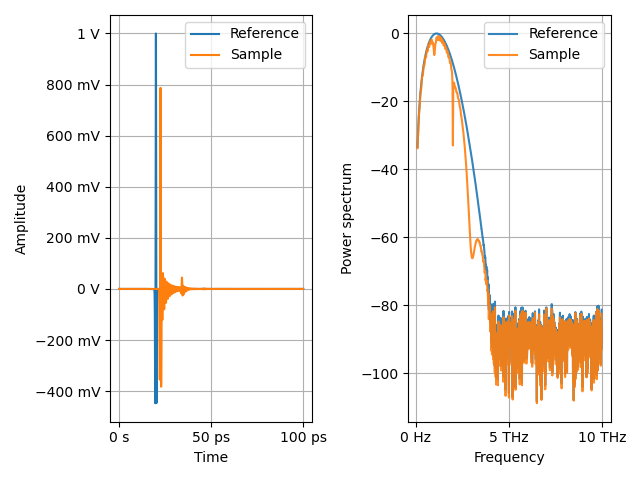

In [8]:
plot = pk.Plot() #pk.plot.Plot()
plot.plot_data(data) #https://stackoverflow.com/questions/51922480/javascript-error-ipython-is-not-defined-in-jupyterlab

## Extraction of optimal thickness

Veri nesnesi, pk.extraction.Extraction sınıfı kullanılarak bir çıkarım nesnesine dönüştürülür. Bu nesne, malzemenin optik özelliklerini çıkarmak için kullanılır.
Faz çözme işlemi, belirli bir frekans aralığında gerçekleştirilir. Bu işlem, sinyallerin faz kaymalarını düzeltir ve doğru bir şekilde analiz edilmesini sağlar.

In [9]:
extract_obj = pk.extraction.Extraction(data)

In [10]:
extract_obj.unwrap_phase(frequency_start=0.3e12, frequency_stop=0.9e12)

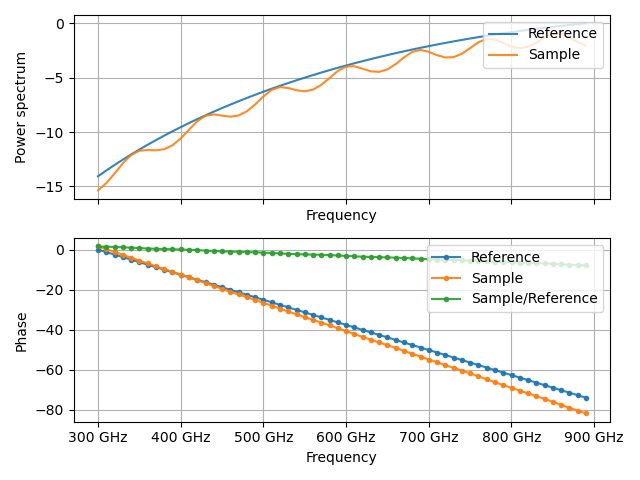

In [11]:
plot.plot_phase(extract_obj)

Başlangıç kırılma indisi ve absorpsiyon katsayısı, örnek kalınlığı kullanılarak hesaplanır. Ayrıca, maksimum delta değeri de hesaplanır. Bu değerler, malzemenin optik özelliklerini belirlemek için başlangıç noktası sağlar.

In [12]:
n, k = extract_obj.get_initial_nk(thickness=sample_thickness)
delta_max = extract_obj.get_max_delta(thickness=sample_thickness)

Farklı kalınlıklar için toplam varyasyon hesaplanır. Bu işlem, malzemenin farklı kalınlıklarda nasıl davrandığını anlamak için kullanılır. Toplam varyasyon, sinyalin farklı kalınlıklarda ne kadar değiştiğini gösterir. Toplam varyasyon hesaplamaları ve görselleştirmeleri, optimal kalınlığı belirlemek için kullanılır. Optimal kalınlık, toplam varyasyonun en düşük olduğu noktada bulunur. Bu, malzemenin en doğru optik özelliklerini elde etmek için gereken kalınlıktır.

In [17]:
thickness_array, tv_dict = extract_obj.get_thickness_array(thickness=1e-3,
                                                           thickness_range=50e-6,
                                                           step_size=1e-6)
tv_dict

  0%|          | 0/100 [00:00<?, ?it/s]

Total Variation, deg=1, optimal thickness: 1 mm
Total Variation, deg=2, optimal thickness: 1 mm
Total Variation, Nick's method, optimal thickness: 1 mm
Offset exponential, optimal thickness: 1 mm


{'Total Variation, deg=1': array([0.79628854, 0.77997059, 0.83706626, 0.97971297, 0.99622798,
        1.        , 0.99784036, 0.9408519 , 0.76719643, 0.69941816,
        0.66746532, 0.51675725, 0.54097159, 0.49175667, 0.47862789,
        0.76311545, 0.72258428, 0.71967078, 0.71708829, 0.69406322,
        0.62151313, 0.62690282, 0.54281487, 0.38431457, 0.49882105,
        0.35466801, 0.37047012, 0.37252371, 0.29206778, 0.33839396,
        0.3046402 , 0.29904239, 0.22553999, 0.26803315, 0.25469811,
        0.22866487, 0.20177328, 0.23308045, 0.19994871, 0.12857522,
        0.175298  , 0.16675196, 0.10365955, 0.1209834 , 0.07806903,
        0.07975156, 0.07970326, 0.0422221 , 0.05474285, 0.04322339,
        0.03906746, 0.04902815, 0.06445205, 0.07520082, 0.08446292,
        0.06791332, 0.07950567, 0.09163026, 0.15742951, 0.16955759,
        0.12932565, 0.14127705, 0.15515899, 0.16630472, 0.178656  ,
        0.19040288, 0.20315733, 0.21525604, 0.22688833, 0.23905346,
        0.25067221, 0.

Optimal kalınlık hesaplandıktan sonra, bu sonuçlar görselleştirilir. Görselleştirme, toplam varyasyonun farklı kalınlıklarda nasıl değiştiğini ve optimal kalınlığın nerede olduğunu anlamak için önemlidir. Bu kod, toplam varyasyonun farklı kalınlıklar için nasıl değiştiğini gösteren bir grafik oluşturur. Grafikte, toplam varyasyonun en düşük olduğu nokta optimal kalınlığı temsil eder.

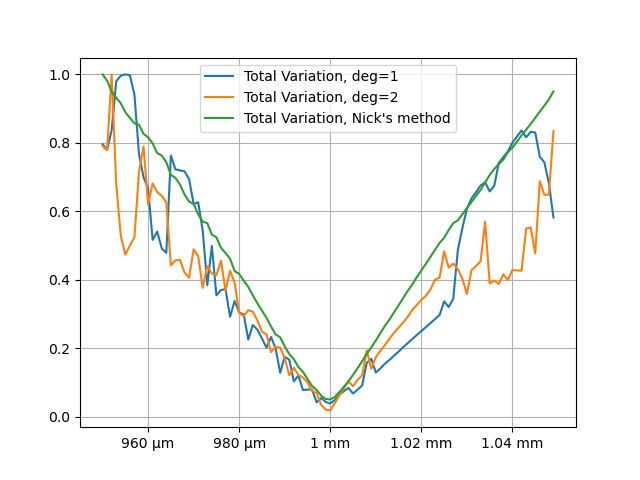

In [18]:
"""
fig, ax = plt.subplots()
ax.plot(thickness_array, tv_dict["tv_1"], label="TotalVariation, deg=1")
ax.plot(thickness_array, tv_dict["tv_2"], label="TotalVariation, deg=2")
ax.plot(thickness_array, tv_dict["tv_n"], label="TotalVariation, Nick's method")
plt.legend()
ax.grid(True)
ax.xaxis.set_major_formatter(EngFormatter("m"))
"""
fig, ax = plt.subplots()
ax.plot(thickness_array, tv_dict["Total Variation, deg=1"], label="Total Variation, deg=1")
ax.plot(thickness_array, tv_dict["Total Variation, deg=2"], label="Total Variation, deg=2")
ax.plot(thickness_array, tv_dict["Total Variation, Nick's method"], label="Total Variation, Nick's method")
plt.legend()
ax.grid(True)
ax.xaxis.set_major_formatter(EngFormatter("m"))
plt.show()

# Extraction
Start the extraction of the refractive index and absorption.
It is helpfull, to create an extraction object:

Faz çözme işlemi, belirli bir frekans aralığında gerçekleştirilir. Bu işlem, sinyallerin faz kaymalarını düzeltir ve doğru bir şekilde analiz edilmesini sağlar.

In [19]:
data = pk.Data(time, ref[:, 1], sam[:, 1])
extract_obj = pk.extraction.Extraction(data)

In [20]:
extract_obj.unwrap_phase(frequency_start=0.3e12, frequency_stop=3.7e12)

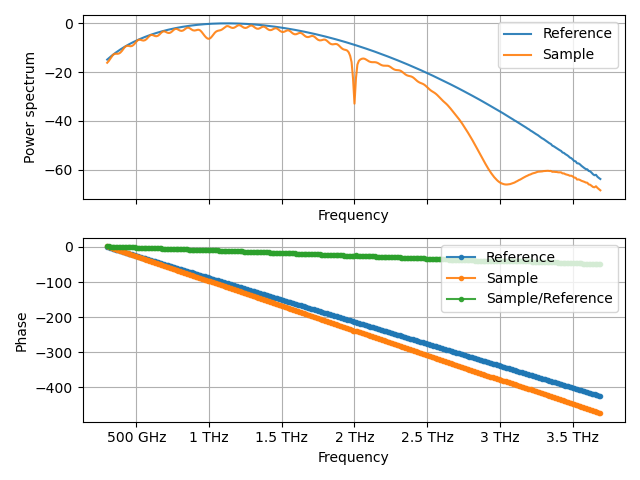

In [21]:
plot.plot_phase(extract_obj)

Getting a first guess of n and k, which is necessary for the optimization algorithm:



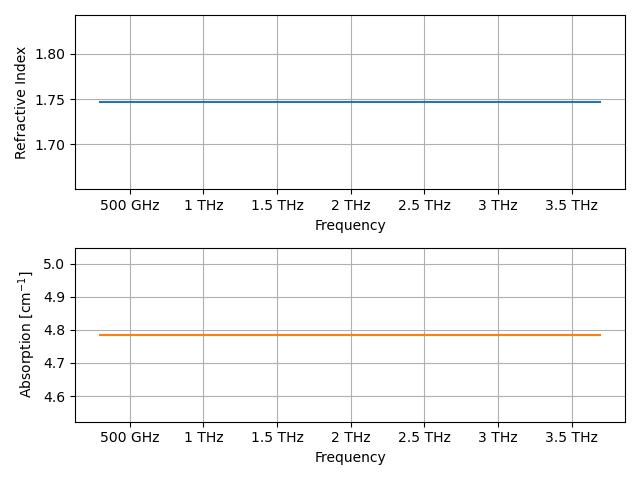

In [22]:
n, k = extract_obj.get_initial_nk(thickness=sample_thickness)
plot.plot_refractive_index(extract_obj.data.frequency, extract_obj.data.n, extract_obj.data.k)

Looking at the time-domain, we cannot only measure the time delta between the peak of reference and sample trace, but also how many echoes (Fabry-Perot reflections) would fit in the remaining time trace:

In [23]:
delta_max = extract_obj.get_max_delta(thickness=sample_thickness)
print(f"Δt:\t\t{EngFormatter('s', places=1)(extract_obj.get_time_shift())}")
print(f"Max. echoes:\t{delta_max}\n")

Δt:		2.5 ps
Max. echoes:	7



# Run optimization

Optimal kalınlık belirlendikten sonra, bu kalınlık kullanılarak malzemenin nihai optik özellikleri (kırılma indisi ve absorpsiyon katsayısı) çıkarılır. Bu işlem, malzemenin frekans alanındaki davranışını daha iyi anlamak için yapılır.

In [31]:
frequency, n_opt, k_opt, alpha_opt = extract_obj.run_optimization(thickness=sample_thickness)
frequency, n_opt, k_opt, alpha_opt

  0%|          | 0/1700 [00:00<?, ?it/s]

(array([3.01970518e+11, 3.03970323e+11, 3.05970127e+11, ...,
        3.69563919e+12, 3.69763899e+12, 3.69963880e+12]),
 array([1.74569553, 1.74571684, 1.74571684, ..., 1.71677919, 1.7169484 ,
        1.71705309]),
 array([0.00028958, 0.00029682, 0.00029682, ..., 0.00585364, 0.00588308,
        0.00598312]),
 array([  3.66545387,   3.78194909,   3.80683033, ..., 906.78532868,
        911.83989075, 927.84643696]))

In [25]:
artificial_data = np.loadtxt("Artifical_n_k_alpha.txt")

Son olarak, çıkarılan optik özellikler görselleştirilir. Bu, malzemenin frekans alanındaki kırılma indisi ve absorpsiyon katsayısının nasıl değiştiğini gösterir.

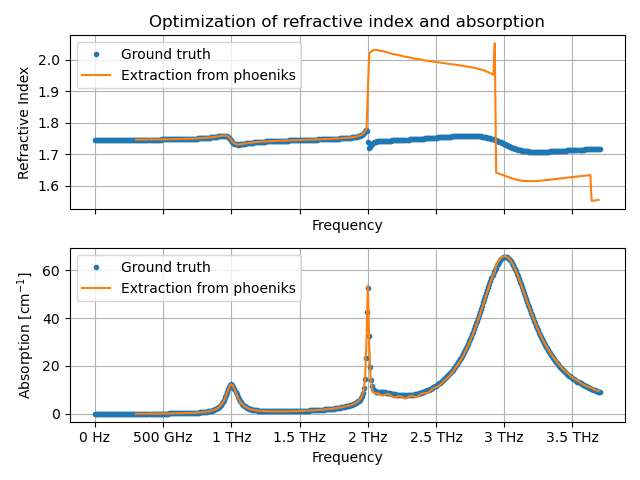

In [26]:
from scipy.constants import c as c_0
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True)
ax[0].set_title("Optimization of refractive index and absorption")
ax[0].plot(artificial_data[:, 0], artificial_data[:, 1], ".", label="Ground truth")
ax[0].plot(frequency, n_opt, label="Extraction from phoeniks")
ax[0].xaxis.set_major_formatter(EngFormatter("Hz"))
ax[0].set_xlabel("Frequency")
ax[0].set_ylabel("Refractive Index")
ax[0].grid(True)
ax[0].legend()

alpha = 0.01 * 4 * np.pi * k * extract_obj.data.frequency / c_0  # In [cm^-1]
ax[1].plot(artificial_data[:, 0], 0.01 * artificial_data[:, 3], ".", label="Ground truth")
ax[1].plot(frequency, 0.01 * alpha_opt, label="Extraction from phoeniks")
ax[1].xaxis.set_major_formatter(EngFormatter("Hz"))
ax[1].set_xlabel("Frequency")
ax[1].set_ylabel(r"Absorption [$\mathrm{cm}^{-1}$]")
ax[1].grid(True)
ax[1].legend()
plt.tight_layout()

The algorithm works from one frequency to the next one. If the phase-jump is too large, the algorithm looses track which results in a deviation of the refractive index.
It is often helpful, to "zero-pad" the time-traces, so that the frequency resolution increases. Even though we don't add new data to the measurement files, the smaller frequency steps make it less likely that there is a phase jump between frequency points outside the $\pm\pi$ range.

# Nihai Amaç (Buraya kadar)
Bu sürecin nihai amacı, THz TDS verilerini kullanarak bir malzemenin optik özelliklerini (kırılma indisi ve absorpsiyon katsayısı gibi) doğru bir şekilde belirlemektir. Bu, malzemenin yapısal ve kimyasal özellikleri hakkında bilgi edinmek için kullanılır. Optimal kalınlık, bu özelliklerin en doğru şekilde çıkarılmasını sağlar.

## Process data with zero-padding

The data is now windowed (to bring the beginning and end of the time-traces to 0) and with zeros padded, to reach a frequency resolution of 2 GHz after applying the FFT.

Zero-padding, zaman alanındaki sinyallere sıfır ekleyerek frekans çözünürlüğünü artırma işlemidir. Bu, Fourier dönüşümü uygulandığında daha ince frekans adımları elde edilmesini sağlar.

window_traces: Zaman izlerini pencereleyerek baş ve son kısımlarını sıfıra getirir. Bu, Fourier dönüşümünün kenar etkilerini azaltır.

pad_zeros: Belirtilen yeni frekans çözünürlüğüne ulaşmak için zaman izlerine sıfır ekler. Burada hedeflenen frekans çözünürlüğü 2 GHz'dir.

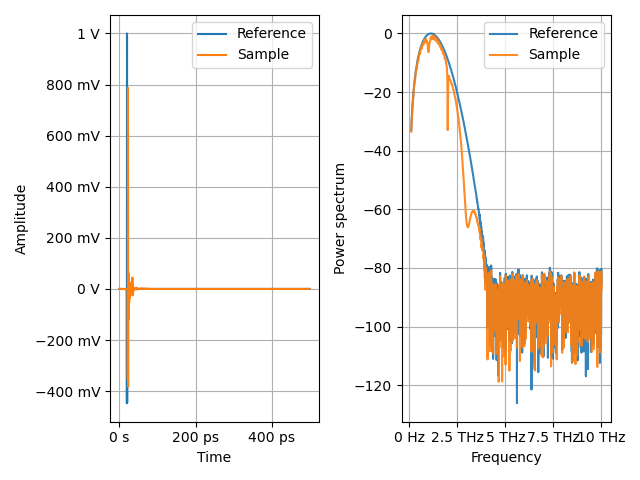

In [27]:
data = pk.Data(time, ref[:, 1], sam[:, 1])

data.window_traces(time_start=10e-12, time_end=90e-12)
data.pad_zeros(new_frequency_resolution=2e9)
plot = pk.plot.Plot()
plot.plot_data(data)

In [28]:
extract_obj = pk.extraction.Extraction(data)
extract_obj.unwrap_phase(frequency_start=0.3e12, frequency_stop=3.7e12)
n, k = extract_obj.get_initial_nk(thickness=sample_thickness)

In [29]:
frequency, n_opt, k_opt, alpha_opt = extract_obj.run_optimization(thickness=sample_thickness)

  0%|          | 0/1700 [00:00<?, ?it/s]

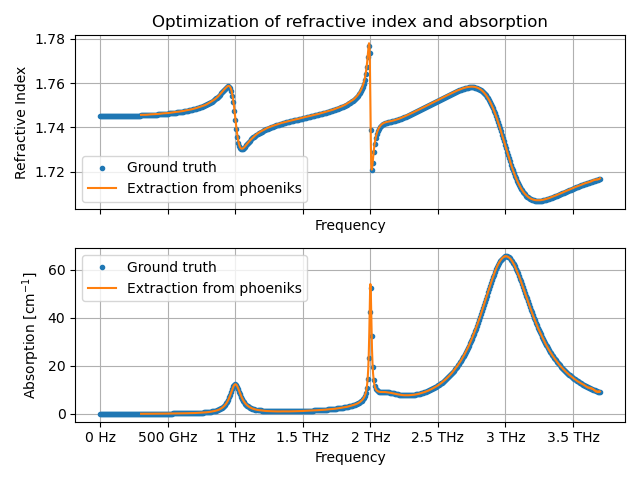

In [30]:
from scipy.constants import c as c_0
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True)
ax[0].set_title("Optimization of refractive index and absorption")
ax[0].plot(artificial_data[:, 0], artificial_data[:, 1], ".", label="Ground truth")
ax[0].plot(frequency, n_opt, label="Extraction from phoeniks")
ax[0].xaxis.set_major_formatter(EngFormatter("Hz"))
ax[0].set_xlabel("Frequency")
ax[0].set_ylabel("Refractive Index")
ax[0].grid(True)
ax[0].legend()

alpha = 0.01 * 4 * np.pi * k * extract_obj.data.frequency / c_0  # In [cm^-1]
ax[1].plot(artificial_data[:, 0], 0.01 * artificial_data[:, 3], ".", label="Ground truth")
ax[1].plot(frequency, 0.01 * alpha_opt, label="Extraction from phoeniks")
ax[1].xaxis.set_major_formatter(EngFormatter("Hz"))
ax[1].set_xlabel("Frequency")
ax[1].set_ylabel(r"Absorption [$\mathrm{cm}^{-1}$]")
ax[1].grid(True)
ax[1].legend()
plt.tight_layout()